# Boston 주택 가격 예측 모델

In [238]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [239]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print("train_data shape:", train_data.shape)    
print("train_labels shape:", train_labels.shape)
print("test_data shape:", test_data.shape)
print("test_labels shape:", test_labels.shape)

train_data shape: (404, 13)
train_labels shape: (404,)
test_data shape: (102, 13)
test_labels shape: (102,)


In [240]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [241]:
model = models.Sequential()

model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1)) 

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_68 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


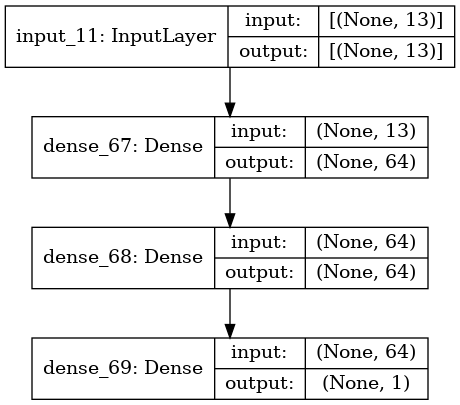

In [242]:
utils.plot_model(model, show_shapes=True)

In [243]:
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=10,
                    validation_split =0.2)

Epoch 1/20
33/33 [==============================] - 1s 6ms/step - loss: 476.8481 - mae: 19.7903 - val_loss: 439.8386 - val_mae: 18.9290
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 273.7044 - mae: 14.2228 - val_loss: 211.5391 - val_mae: 11.8802
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 104.6767 - mae: 7.8547 - val_loss: 90.4077 - val_mae: 7.1630
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 52.6422 - mae: 5.2866 - val_loss: 59.1989 - val_mae: 5.5516
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 34.5629 - mae: 4.1323 - val_loss: 38.4207 - val_mae: 4.5176
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 25.3313 - mae: 3.4817 - val_loss: 27.9875 - val_mae: 3.8695
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 20.9599 - mae: 3.1009 - val_loss: 23.7974 - val_mae: 3.6114
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - l

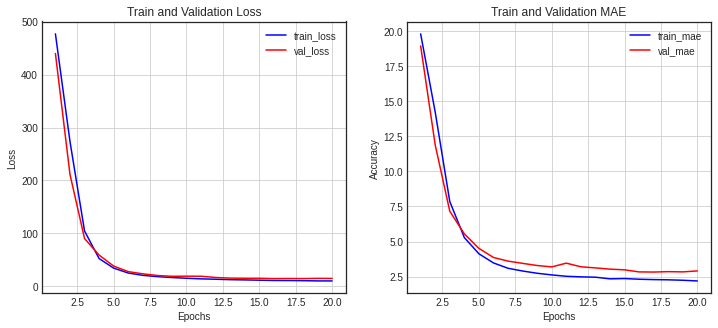

In [244]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [245]:
test_mse, test_mae = model.evaluate(test_data, test_labels, verbose=2)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test MAE: {test_mae:.2f} (in $1,000)")

4/4 - 0s - loss: 24.8561 - mae: 3.3467
Test MSE: 24.86
Test MAE: 3.35 (in $1,000)


In [246]:
predictions = model.predict(test_data)
print(predictions[:1])

[[7.544261]]


In [247]:
print(test_labels[0])

7.2


# Reuters 딥러닝 모델

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [249]:
num_words =10000
(x_train_full, y_train_full), (test_data, test_labels) = reuters.load_data(num_words = num_words)

train_data, val_data, train_labels, val_labels = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.25,
                                                  random_state=123)

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [250]:
# 원-핫 인코딩 함수 정의
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))  # 모든 데이터를 (샘플 수, 차원) 크기의 0 배열로 초기화
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0  # 해당 위치를 1로 설정
    return results

In [251]:
from tensorflow.keras.utils import to_categorical

# 원-핫 인코딩 수행
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터를 범주형 데이터로 변환
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

# 데이터 형태 확인
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (6736, 10000)
y_train shape: (6736, 46)
x_val shape: (2246, 10000)
y_val shape: (2246, 46)
x_test shape: (2246, 10000)
y_test shape: (2246, 46)


In [252]:
# 모델 정의
model = models.Sequential()

# 입력층 및 은닉층
model.add(layers.Dense(512, input_shape=(num_words,)))
model.add(layers.BatchNormalization())  # BatchNormalization 적용
model.add(layers.Activation('relu'))    # 활성화 함수
model.add(layers.Dropout(0.5))          # Dropout 적용 (50%)

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())  # BatchNormalization 적용
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))          # Dropout 적용 (50%)

# 출력층
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               5120512   
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_27 (Batc (None, 256)               1024      
_________________________________________________________________
activation_27 (Activation)   (None, 256)             

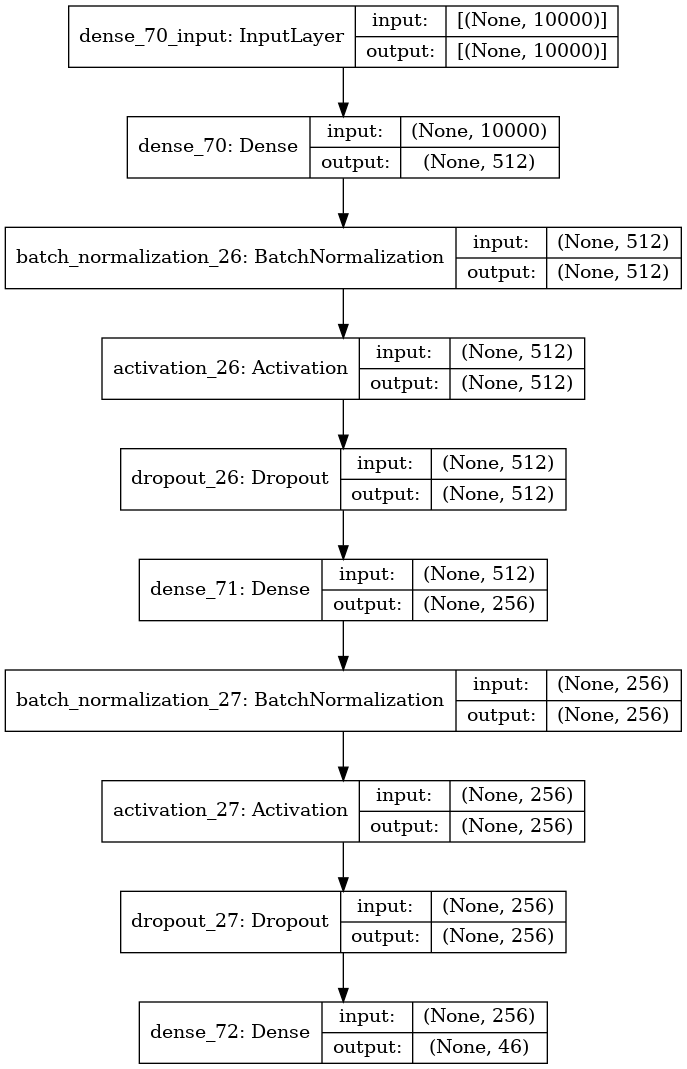

In [253]:
utils.plot_model(model, show_shapes=True)

In [254]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 함수 설정
check_point_cb = ModelCheckpoint(
    filepath='best_model.h5',  # 최적 가중치를 저장할 파일 경로
    monitor='val_loss',        # 검증 손실(val_loss)을 기준으로 저장
    save_best_only=True,       # 최적 성능일 경우만 저장
    verbose=1
)

early_stopping_cb = EarlyStopping(
    monitor='val_loss',        # 검증 손실(val_loss)을 기준으로 조기 종료
    patience=5,                # 개선되지 않는 에포크가 5회 지속되면 종료
    verbose=1,
    restore_best_weights=True  # 최적 가중치를 복원
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,                # 최대 에포크 수
    batch_size=128,           # 배치 크기
    validation_data=(x_val, y_val),
    callbacks=[check_point_cb, early_stopping_cb]  # 콜백 함수 적용
)


Epoch 1/50
53/53 [==============================] - 1s 15ms/step - loss: 1.9353 - accuracy: 0.5732 - val_loss: 2.3401 - val_accuracy: 0.7030

Epoch 00001: val_loss improved from inf to 2.34007, saving model to best_model.h5
Epoch 2/50
53/53 [==============================] - 0s 7ms/step - loss: 0.9258 - accuracy: 0.7886 - val_loss: 1.7005 - val_accuracy: 0.7257

Epoch 00002: val_loss improved from 2.34007 to 1.70054, saving model to best_model.h5
Epoch 3/50
53/53 [==============================] - 0s 7ms/step - loss: 0.6273 - accuracy: 0.8480 - val_loss: 1.3032 - val_accuracy: 0.7663

Epoch 00003: val_loss improved from 1.70054 to 1.30318, saving model to best_model.h5
Epoch 4/50
53/53 [==============================] - 0s 7ms/step - loss: 0.4243 - accuracy: 0.9022 - val_loss: 1.0637 - val_accuracy: 0.7841

Epoch 00004: val_loss improved from 1.30318 to 1.06367, saving model to best_model.h5
Epoch 5/50
53/53 [==============================] - 0s 7ms/step - loss: 0.3212 - accuracy: 0.92

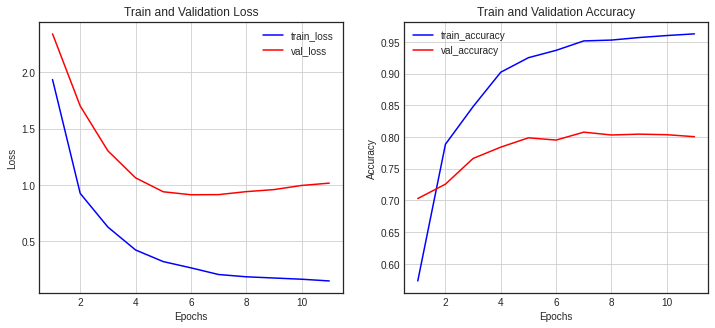

In [255]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [256]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=2)
print(f"Best Model Test Loss: {test_loss:.4f}")
print(f"Best Model Test Accuracy: {test_accuracy:.4f}")


71/71 - 0s - loss: 0.8982 - accuracy: 0.8010
Best Model Test Loss: 0.8982
Best Model Test Accuracy: 0.8010


In [257]:
predictions = model.predict(x_test)
print(predictions[:1])

[[3.7904116e-04 7.3804072e-04 4.0615626e-04 9.3776876e-01 3.9035279e-02
  2.1885106e-04 1.2338579e-04 2.8323132e-04 1.6348099e-03 7.4062624e-04
  5.8170466e-04 7.4888574e-04 3.0186473e-04 2.3678498e-04 1.7627522e-04
  3.2120920e-04 1.2090381e-03 4.7444261e-04 3.5768194e-04 1.4680339e-03
  4.0949662e-03 8.2082959e-04 1.7294490e-04 3.9220040e-04 1.6688574e-04
  2.1925381e-04 1.6357347e-04 7.1628112e-04 5.2690390e-04 4.2453915e-04
  3.4093019e-04 4.6279345e-04 1.7650062e-04 1.6324823e-04 3.5756530e-04
  4.4993302e-04 5.1299890e-04 3.7996334e-04 1.8152494e-04 4.8282830e-04
  2.7044659e-04 3.0846201e-04 3.1879815e-04 2.5880133e-04 1.9355523e-04
  2.3912806e-04]]


In [258]:
print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# CIFAR10 딥러닝 모델

In [259]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [260]:
# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터에서 20%를 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 데이터 크기 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [261]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

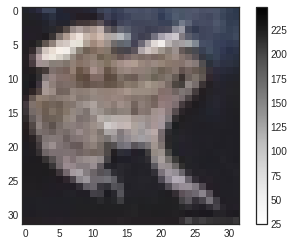

In [262]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [263]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(x_train[0])

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
[[[34 36 43]
  [37 37 51]
  [44 44 64]
  ...
  [62 73 93]
  [52 63 83]
  [45 57 77]]

 [[35 35 37]
  [34 34 40]
  [34 33 43]
  ...
  [58 69 89]
  [50 60 80]
  [47 58 78]]

 [[34 33 35]
  [33 32 36]
  [33 32 38]
  ...
  [66 77 97]
  [51 62 82]
  [53 64 84]]

 ...

 [[32 32 38]
  [32 31 37]
  [33 33 38]
  ...
  [41 38 45]
  [34 31 38]
  [36 32 40]]

 [[33 31 36]
  [32 30 36]
  [34 32 37]
  ...
  [37 35 40]
  [32 29 35]
  [30 28 33]]

 [[37 32 35]
  [37 32 36]
  [37 33 36]
  ...
  [49 47 49]
  [47 45 48]
  [58 56 58]]]


In [264]:
# 데이터를 1차원으로 변형
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# 데이터 형태 확인
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(x_train[0])


(40000, 3072)
(10000, 3072)
(10000, 3072)
[34 36 43 ... 58 56 58]


In [265]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.
print(x_train[0])

[0.13333333 0.14117647 0.16862745 ... 0.22745098 0.21960784 0.22745098]


In [266]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

# 레이블을 범주형 데이터로 변환
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# 모델 정의
model = models.Sequential()

# 입력층 및 첫 번째 은닉층
model.add(layers.Dense(1536, input_shape=(3072,)))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Activation('relu'))    # 활성화 함수
model.add(layers.Dropout(0.5))          # Dropout 추가

# 두 번째 은닉층
model.add(layers.Dense(768))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))          # Dropout 추가

# 세 번째 은닉층
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))          # Dropout 추가



# 출력층
model.add(layers.Dense(10, activation='softmax'))  # 10개의 클래스 분류

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 요약
model.summary()


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
batch_normalization_28 (Batc (None, 1536)              6144      
_________________________________________________________________
activation_28 (Activation)   (None, 1536)              0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 1536)              0         
_________________________________________________________________
dense_74 (Dense)             (None, 768)               1180416   
_________________________________________________________________
batch_normalization_29 (Batc (None, 768)               3072      
_________________________________________________________________
activation_29 (Activation)   (None, 768)             

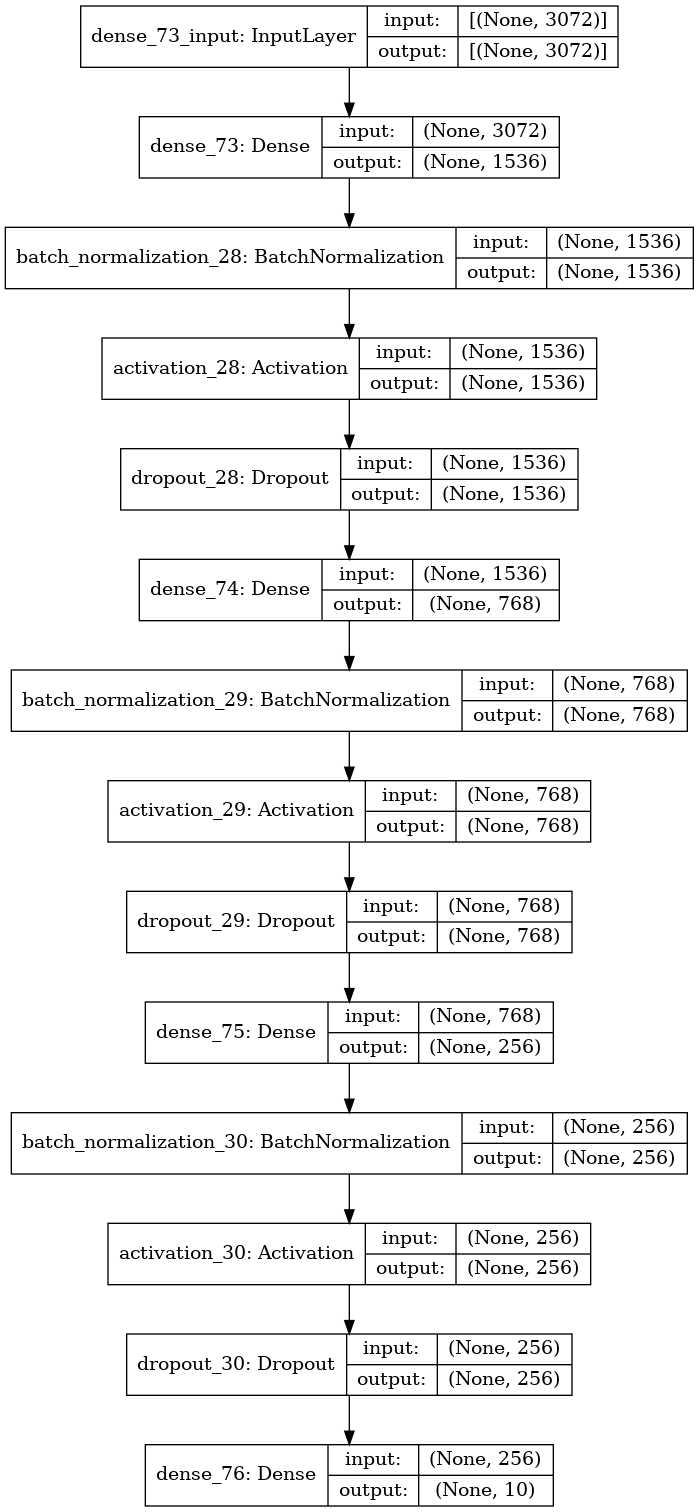

In [267]:
utils.plot_model(model, show_shapes=True)

In [268]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 설정
check_point_cb = ModelCheckpoint(
    filepath='best_cifar10_model.h5',  # 최적 모델 가중치를 저장할 파일 경로
    monitor='val_loss',               # 검증 손실(val_loss)을 기준으로 저장
    save_best_only=True,              # 가장 성능이 좋은 모델만 저장
    verbose=1
)

# EarlyStopping 설정
early_stopping_cb = EarlyStopping(
    monitor='val_loss',               # 검증 손실(val_loss)을 기준으로 조기 종료
    patience=5,                       # 개선되지 않는 에포크가 5회 지속되면 종료
    verbose=1,
    restore_best_weights=True         # 최적 가중치를 복원
)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=50,                       # 최대 에포크 수
    batch_size=128,                  # 배치 크기
    validation_data=(x_val, y_val),
    callbacks=[check_point_cb, early_stopping_cb]  # 콜백 함수 적용
)


Epoch 1/50
313/313 [==============================] - 3s 7ms/step - loss: 2.0064 - accuracy: 0.3034 - val_loss: 1.8870 - val_accuracy: 0.3055

Epoch 00001: val_loss improved from inf to 1.88705, saving model to best_cifar10_model.h5
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6860 - accuracy: 0.3931 - val_loss: 1.7879 - val_accuracy: 0.3777

Epoch 00002: val_loss improved from 1.88705 to 1.78789, saving model to best_cifar10_model.h5
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 1.5835 - accuracy: 0.4329 - val_loss: 1.6320 - val_accuracy: 0.4228

Epoch 00003: val_loss improved from 1.78789 to 1.63204, saving model to best_cifar10_model.h5
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 1.5205 - accuracy: 0.4583 - val_loss: 1.6076 - val_accuracy: 0.4240

Epoch 00004: val_loss improved from 1.63204 to 1.60765, saving model to best_cifar10_model.h5
Epoch 5/50
313/313 [==============================] - 2s

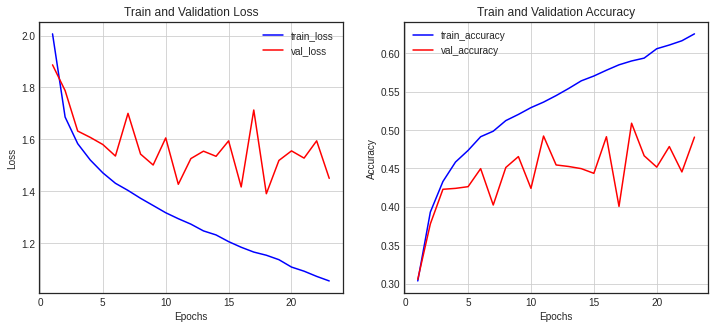

In [269]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [270]:
# 테스트 데이터 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 1s - loss: 1.3915 - accuracy: 0.5104
Test Loss: 1.3915
Test Accuracy: 0.5104


In [271]:
predictions = model.predict(x_test)
print(predictions[:1])

[[0.13142803 0.09239535 0.06607264 0.2643146  0.13504052 0.11425795
  0.05177651 0.01219082 0.10768653 0.02483705]]


In [272]:
print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
